## Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db = pd.read_csv('db.csv', low_memory=False)
db.shape

(33543, 35)

In [4]:
db.columns

Index(['Unnamed: 0', 'FCS', 'CORR', 'BUFF_OVERFLOW', 'GENERIC', 'PCKT_NUM',
       'TIME(MS)', 'LENGTH', 'PAYLOAD', 'RSSI', 'CRC_OK', 'FRAME_TYPE',
       'SECURITY_ENABLED', 'FRAME_PENDING', 'ACKNOWLEDGE_REQ',
       'PAN_COMPRESSION', 'DEST_PAN', 'DEST_ADD', 'SRC_PAN', 'SRC_ADD', 'DATA',
       'CMD', 'ACK', '1_OCT_HEADER', 'CSL_WAKEUP', 'CSL_SECURE_ACK',
       'RFID_BLINK', 'BCN', 'TEST_TYPE', 'CONTROL', 'DOUBLENETWORK', 'ELECTRO',
       'NORMAL', 'VIENTO', 'WIRELESS'],
      dtype='object')

In [5]:
db = db.drop(['Unnamed: 0'], axis = 1)
db.head()

,FCS,CORR,BUFF_OVERFLOW,GENERIC,PCKT_NUM,TIME(MS),LENGTH,PAYLOAD,RSSI,CRC_OK,...,CSL_SECURE_ACK,RFID_BLINK,BCN,TEST_TYPE,CONTROL,DOUBLENETWORK,ELECTRO,NORMAL,VIENTO,WIRELESS
0,1,1,0,0,1,0.000000,11,NaN,-98.0,1.0,...,0,0,0,control,1,0,0,0,0,0
1,1,1,0,0,2,16751.182375,11,NaN,-99.0,1.0,...,0,0,0,control,1,0,0,0,0,0
2,1,1,0,0,3,1.070000,14,NaN,-90.0,1.0,...,0,0,1,control,1,0,0,0,0,0
3,1,1,0,0,4,652.697750,11,NaN,-91.0,1.0,...,0,0,0,control,1,0,0,0,0,0
4,1,1,0,0,5,2.006625,14,NaN,-90.0,1.0,...,0,0,1,control,1,0,0,0,0,0


In [6]:
db.columns

Index(['FCS', 'CORR', 'BUFF_OVERFLOW', 'GENERIC', 'PCKT_NUM', 'TIME(MS)',
       'LENGTH', 'PAYLOAD', 'RSSI', 'CRC_OK', 'FRAME_TYPE', 'SECURITY_ENABLED',
       'FRAME_PENDING', 'ACKNOWLEDGE_REQ', 'PAN_COMPRESSION', 'DEST_PAN',
       'DEST_ADD', 'SRC_PAN', 'SRC_ADD', 'DATA', 'CMD', 'ACK', '1_OCT_HEADER',
       'CSL_WAKEUP', 'CSL_SECURE_ACK', 'RFID_BLINK', 'BCN', 'TEST_TYPE',
       'CONTROL', 'DOUBLENETWORK', 'ELECTRO', 'NORMAL', 'VIENTO', 'WIRELESS'],
      dtype='object')

In [7]:
ignore = ['PAYLOAD', 'CRC_OK', 'FRAME_TYPE', 'DEST_PAN', 'DEST_ADD', 'SRC_PAN', 'SRC_ADD', 'TEST_TYPE']
y = db['CRC_OK']
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
33538    1.0
33539    0.0
33540    0.0
33541    1.0
33542    1.0
Name: CRC_OK, Length: 33543, dtype: float64

In [11]:
numdb = db.drop(ignore, axis = 1)
d = pd.DataFrame({'OK':y.values})
numdb = pd.concat([numdb, d], axis=1)
numdb.head()

,FCS,CORR,BUFF_OVERFLOW,GENERIC,PCKT_NUM,TIME(MS),LENGTH,RSSI,SECURITY_ENABLED,FRAME_PENDING,...,CSL_SECURE_ACK,RFID_BLINK,BCN,CONTROL,DOUBLENETWORK,ELECTRO,NORMAL,VIENTO,WIRELESS,OK
0,1,1,0,0,1,0.000000,11,-98.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1.0
1,1,1,0,0,2,16751.182375,11,-99.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1.0
2,1,1,0,0,3,1.070000,14,-90.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,1.0
3,1,1,0,0,4,652.697750,11,-91.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1.0
4,1,1,0,0,5,2.006625,14,-90.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,1.0


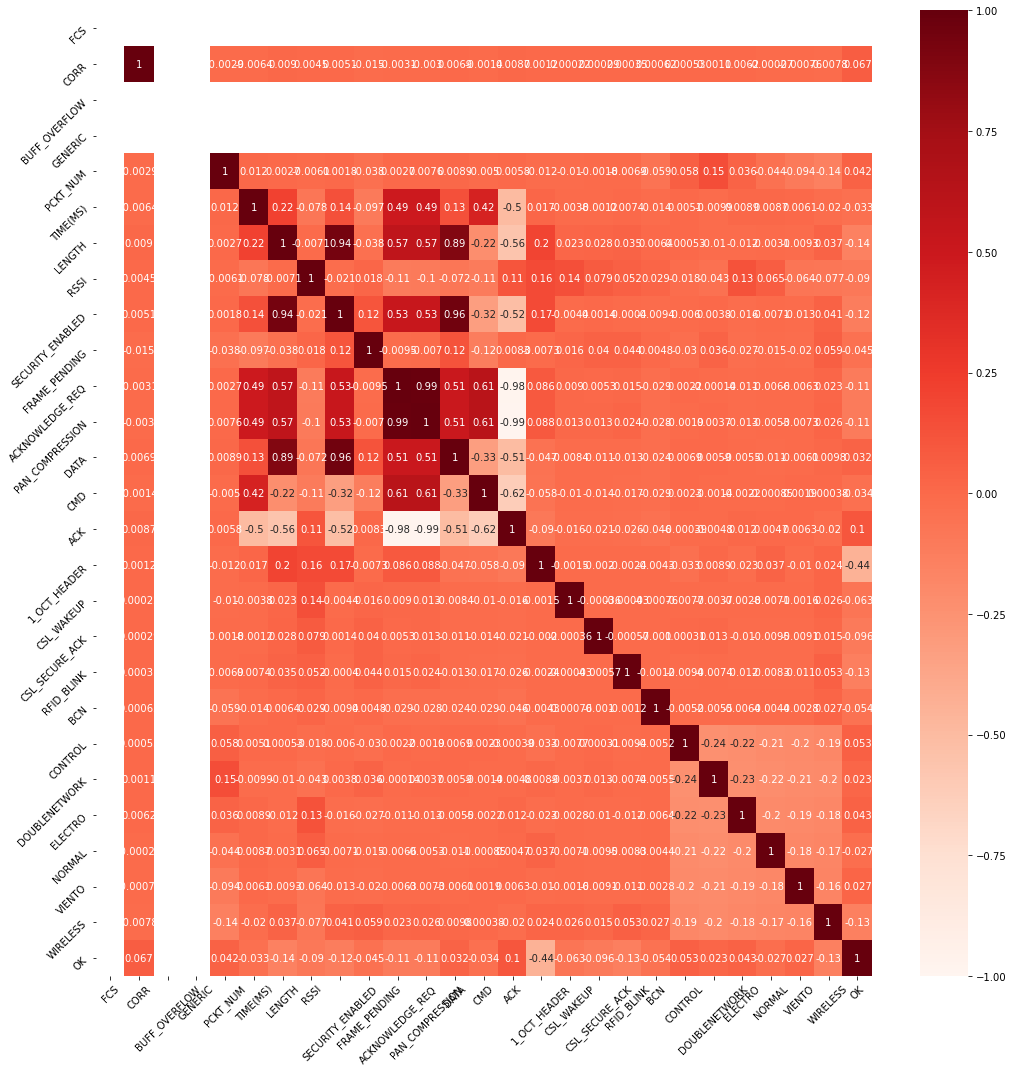

In [17]:
plt.figure(figsize=(15,15))
correlation = numdb.corr(method='pearson')
ax = sns.heatmap(correlation, annot = True, cmap='Reds', vmin=-1, vmax=1)
ax.set_yticklabels(list(numdb.columns), rotation = 45, fontsize = 10)
ax.set_xticklabels(list(numdb.columns), rotation = 45, fontsize = 10)
plt.tight_layout()
plt.savefig("corr-original.png", dpi=500)
plt.show()